## Візуалізація даних за допомогою matplotlib та Seaborn
**Мета роботи:** Ознайомитись з основними діаграмами та графіками, що
використовуються при аналізі даних. Навчитись будувати їх за допомогою
бібліотек matplotlib та Seaborn.

## Завдання до лабораторної роботи
Створити програму, яка виконує завдання відповідно до варіанту з
використанням matplotlib та/або Seaborn.

**Варіант 3.**

1. Побудувати стовпчикові діаграми, на яких відобразити 
    - а) кількість мерседесів кожної моделі; 
    - б) середню ціну мерседесів кожної моделі; 
    - в) середню ціну мерседесів кожної моделі з розподілом за типом коробки передач.
2. Побудувати гістограму розподілу ціни, загальну і для кожного виду коробки передач.
3. Побудувати діаграму розмаху витрат палива (загальну і в залежності від типу палива), визначити чи присутні викиди.
4. За допомогою діаграм розсіювання зробити висновки щодо залежності між 
    - а) ціною та пробігом; 
    - б) витратами на паливо та об’ємом двигуна.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('merc.csv')
display(df)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
1497,V Class,2018,21996,Manual,32095,Diesel,145,46.3,2.1
1498,V Class,2018,19346,Manual,34483,Diesel,150,46.3,2.1
1499,V Class,2019,20391,Automatic,18812,Diesel,150,48.7,2.1
1500,GLA Class,2019,20995,Manual,6587,Petrol,145,40.9,1.6


### 1. Побудувати стовпчикові діаграми, на яких відобразити
- **а) кількість мерседесів кожної моделі;**
- **б) середню ціну мерседесів кожної моделі;**
- **в) середню ціну мерседесів кожної моделі з розподілом за типом коробки передач.**

**а) кількість мерседесів кожної моделі**

<AxesSubplot:>

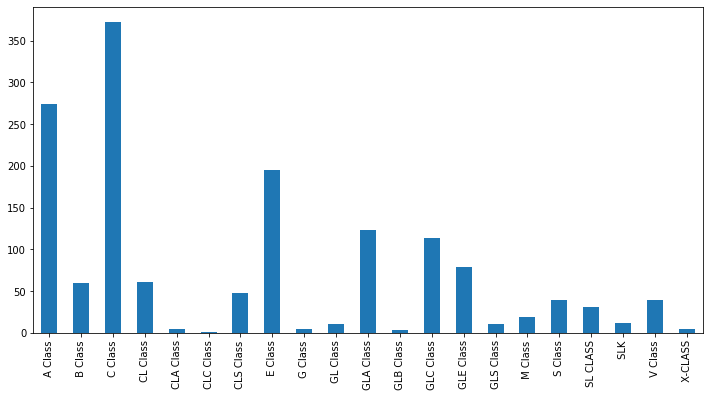

In [3]:
plt.figure(figsize=(12, 6))
df['model'].value_counts().sort_index().plot.bar()

**б) середню ціну мерседесів кожної моделі**

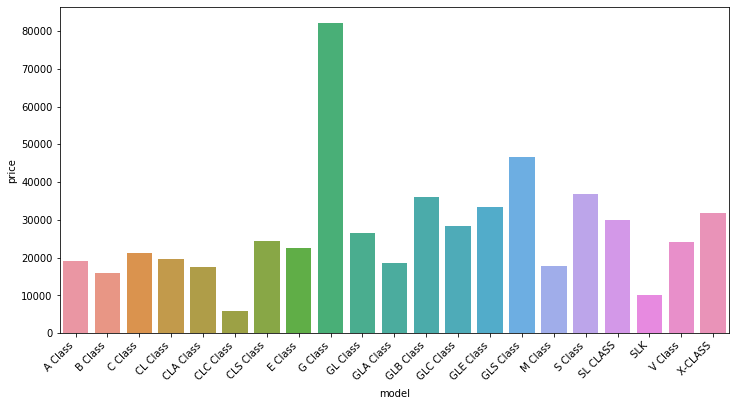

In [4]:
prices = df.groupby(by='model').mean().reset_index()
plt.figure(figsize=(12, 6))
chart = sns.barplot(x='model', y='price', data=prices)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

**в) середню ціну мерседесів кожної моделі з розподілом за типом коробки передач**

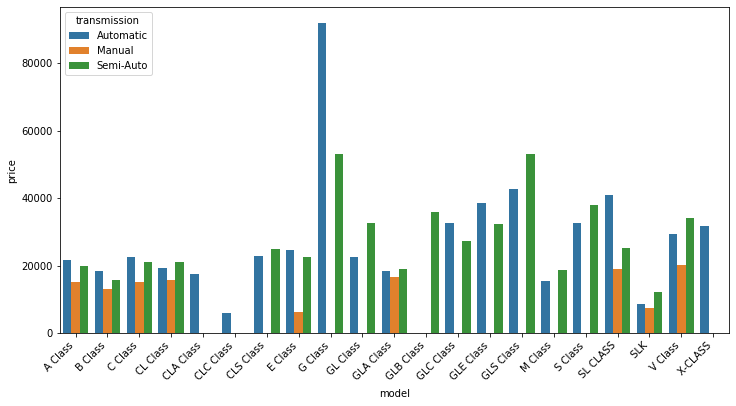

In [5]:
plt.figure(figsize=(12, 6))
trans_prices = df.groupby(by=['model', 'transmission']).mean()['price'].reset_index()
chart = sns.barplot(x='model', y='price', hue='transmission', data=trans_prices)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<AxesSubplot:xlabel='model'>

<Figure size 864x432 with 0 Axes>

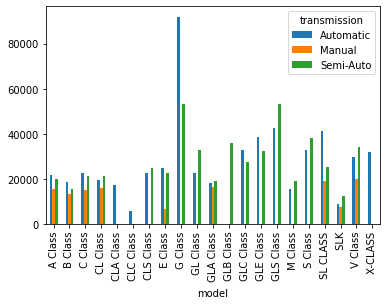

In [6]:
plt.figure(figsize=(12, 6))
pd.pivot_table(df, values='price', index='model', columns=['transmission'], aggfunc=np.mean).plot(kind='bar')

### 2. Побудувати гістограму розподілу ціни, загальну і для кожного виду коробки передач.

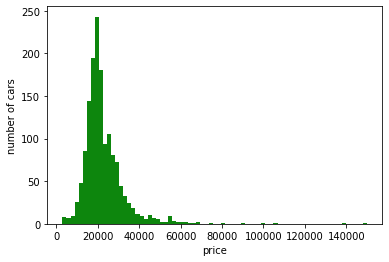

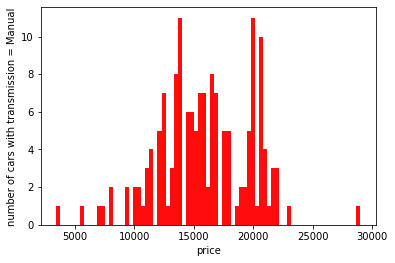

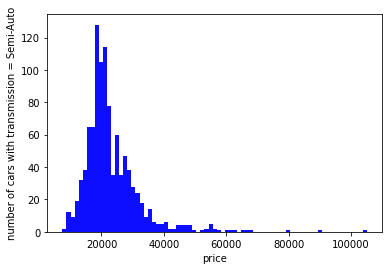

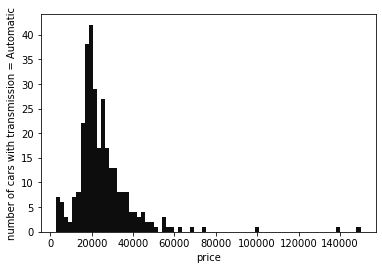

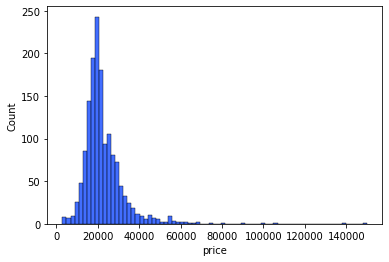

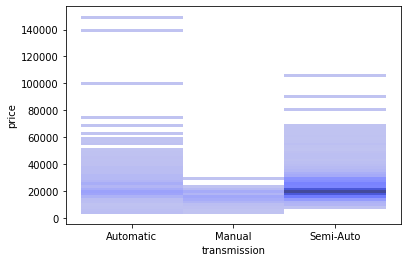

In [7]:
merc = pd.read_csv('merc.csv')

plt.xlabel('price')
plt.ylabel('number of cars')
numberOfBins = 75
plt.hist(merc['price'],color='green', alpha=0.95, bins=numberOfBins)
plt.show()

transmissions = set()
colors = ['red', 'blue', 'black', 'orange', 'purple', 'yellow']
for transmission in merc['transmission']:
    transmissions.add(transmission)
x = 0
for transmission in transmissions:
    plt.xlabel('price')
    plt.ylabel(f'number of cars with transmission = {transmission}')
    plt.hist(merc.where(lambda x: x['transmission'] == transmission)['price'], color=colors[x % len(colors)], alpha=0.95, bins=numberOfBins)
    x += 1
    plt.show()
sns.set_palette("bright")
sns.histplot(x='price', data=merc, bins=numberOfBins)
plt.show()
sns.histplot(x='transmission', y='price', data=merc, bins=numberOfBins)
plt.show()

### 3. Побудувати діаграму розмаху витрат палива (загальну і в залежності від типу палива), визначити чи присутні викиди.

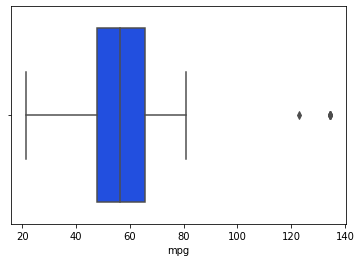

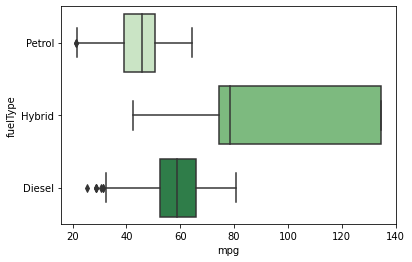

In [8]:
merc = pd.read_csv('merc.csv')
sns.boxplot(x='mpg', data=merc)
plt.show()
sns.boxplot(x='mpg', y='fuelType', palette="Greens", data=merc)
plt.show()

### 4. За допомогою діаграм розсіювання зробити висновки щодо залежності між
- **а) ціною та пробігом;**
- **б) витратами на паливо та об’ємом двигуна.**

**а) ціною та пробігом**

<AxesSubplot:title={'center':'між ціною та пробігом'}, xlabel='mileage', ylabel='price'>

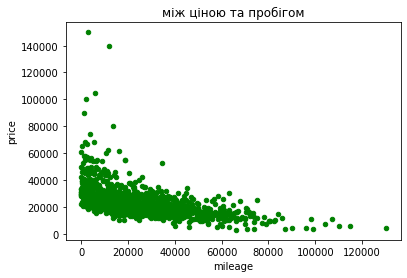

In [9]:
df.plot.scatter(x='mileage', y='price', title='між ціною та пробігом', c='green')

схоже на обернену логарифмічну залежність, чим більше пробіг машини - тим вона дешевша

**б) витратами на паливо та об’ємом двигуна**

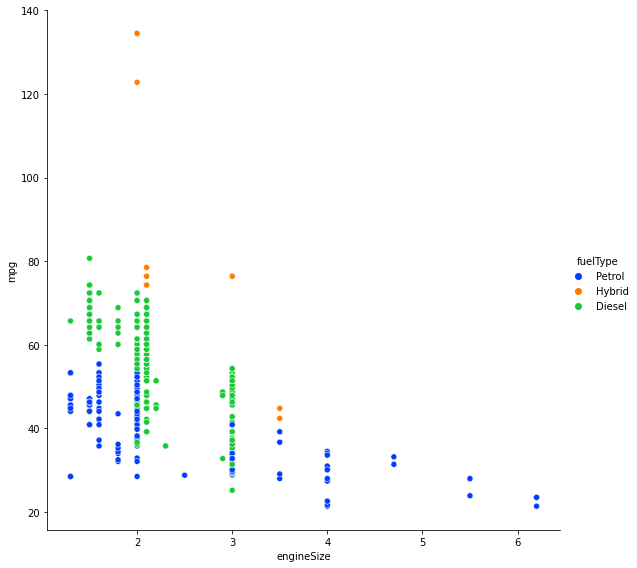

In [10]:
sns.relplot(data=df, x='engineSize', y='mpg', hue='fuelType', height=8)

схоже на лінійну залежність, чим більше розмір двигуна машини, тим більше використання палива